In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('audit_risk.csv')
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [3]:
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [4]:
data.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [5]:
data = data.select_dtypes(exclude='object').dropna()

In [6]:
x = data.iloc[:,:-1]
x.shape

(775, 25)

In [7]:
y = data.iloc[:,-1]
y.shape

(775,)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info

array([0.13673773, 0.24927015, 0.19959432, 0.24044232, 0.25531548,
       0.21969754, 0.2872112 , 0.36406374, 0.09936199, 0.05134125,
       0.08091016, 0.32825013, 0.3166149 , 0.31131503, 0.1178764 ,
       0.02237026, 0.13153657, 0.06708855, 0.07408913, 0.08416499,
       0.46098473, 0.58495617, 0.18120988, 0.03948762, 0.67085508])

In [10]:
mutual_info_series = pd.Series(mutual_info,index=x.columns)
mutual_info_series.sort_values(ascending=False)

Audit_Risk        0.670855
Inherent_Risk     0.584956
Score             0.460985
TOTAL             0.364064
Money_Value       0.328250
Score_MV          0.316615
Risk_D            0.311315
Risk_B            0.287211
PARA_B            0.255315
PARA_A            0.249270
Risk_A            0.240442
Score_B           0.219698
Score_A           0.199594
CONTROL_RISK      0.181210
Sector_score      0.136738
RiSk_E            0.131537
District_Loss     0.117876
numbers           0.099362
Risk_F            0.084165
Risk_C            0.080910
Prob              0.074089
History           0.067089
Score_B.1         0.051341
Detection_Risk    0.039488
PROB              0.022370
dtype: float64

<AxesSubplot:>

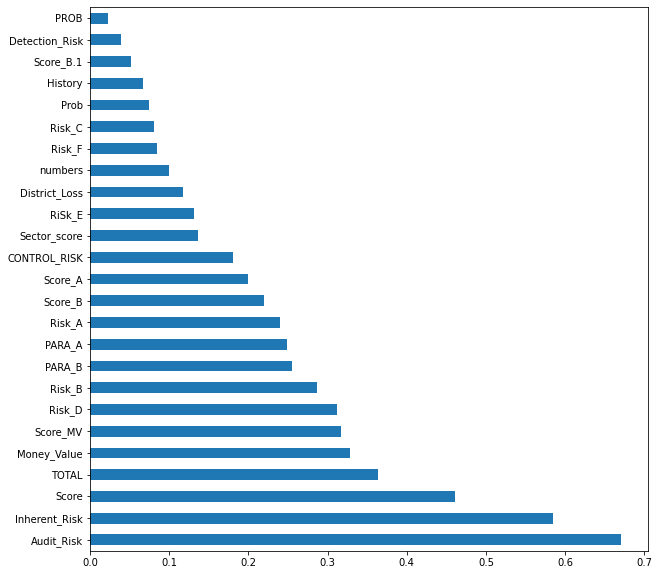

In [11]:
plt.figure(figsize=(10,10))
mutual_info_series.sort_values(ascending=False).plot(kind='barh')